## <span style="color:black"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

#### Modello 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.compat.v1.set_random_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('ok')

ok


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [6]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2824 - accuracy: 0.9174 - val_loss: 0.1254 - val_accuracy: 0.9595
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1237 - accuracy: 0.9635 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0876 - accuracy: 0.9749 - val_loss: 0.0956 - val_accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.0815 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0834 - val_accuracy: 0.9776


313/313 [==============================] - 4s 11ms/step - loss: 0.0834 - accuracy: 0.9776

Test loss: 0.08336608111858368
Test accuracy: 0.9775999784469604


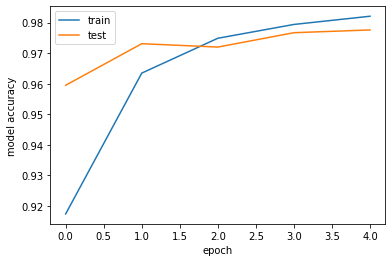

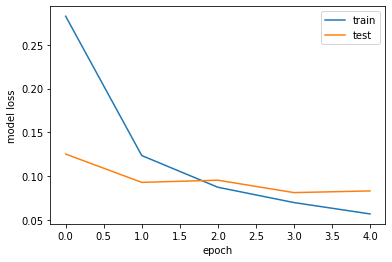

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

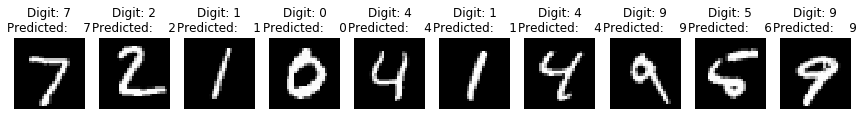

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
score
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

#### Modello 2

In [176]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.compat.v1.set_random_seed(seed)

In [177]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [178]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('ok')

ok


In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [180]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [181]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2809 - accuracy: 0.9197 - val_loss: 0.1357 - val_accuracy: 0.9637
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1564 - accuracy: 0.9609 - val_loss: 0.1338 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1466 - accuracy: 0.9673 - val_loss: 0.1509 - val_accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1458 - accuracy: 0.9699 - val_loss: 0.1606 - val_accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1519 - accuracy: 0.9712 - val_loss: 0.1710 - val_accuracy: 0.9745


313/313 [==============================] - 1s 4ms/step - loss: 0.1710 - accuracy: 0.9745

Test loss: 0.170973002910614
Test accuracy: 0.9745000004768372


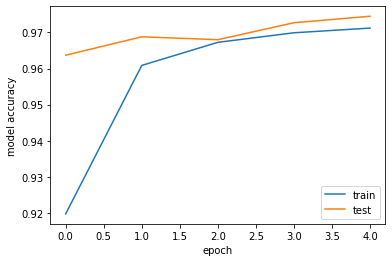

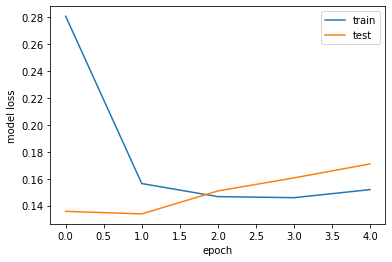

In [182]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

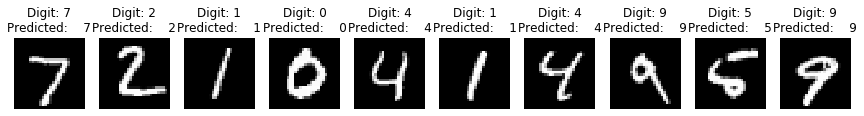

In [183]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Rispetto ad SGD, Adam sembra dare una loss più bassa ed una accuracy più elevata, ma nonostante questo fornisce un $90\%$ di soluzioni corrette.
RMSprop presenta una loss più elevata e un andamento crescente, ma su dati di test presenta il $100\%$ di soluzioni corrette.

### Exercise 12.2

#### Creating Convolutional Neural Nets with Keras

In [9]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [10]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_CNN():
    # instantiate model
    model = Sequential()
    # First convolution
    model.add(Conv2D(18, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D())
    # Second convolution
    model.add(Conv2D(48, kernel_size=(5, 5),
                     activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D())
    #Flatten
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 18)        468       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 18)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 48)          21648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 48)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 768)              

In [11]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 180s 96ms/step - loss: 0.2686 - accuracy: 0.9143 - val_loss: 0.1477 - val_accuracy: 0.9777
Epoch 2/5
1875/1875 [==============================] - 179s 96ms/step - loss: 0.1263 - accuracy: 0.9608 - val_loss: 0.1187 - val_accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.1007 - accuracy: 0.9680 - val_loss: 0.1064 - val_accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0870 - accuracy: 0.9734 - val_loss: 0.0843 - val_accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0806 - accuracy: 0.9744 - val_loss: 0.0690 - val_accuracy: 0.9885

Test loss: 0.08336608111858368
Test accuracy: 0.9775999784469604


313/313 [==============================] - 3s 10ms/step - loss: 0.0690 - accuracy: 0.9885

Test loss: 0.06902112066745758
Test accuracy: 0.9884999990463257


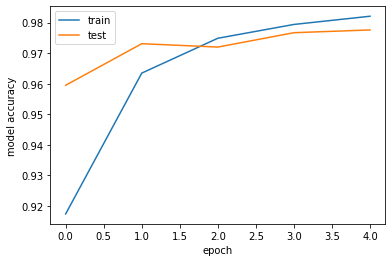

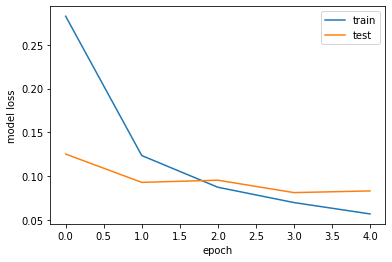

In [12]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

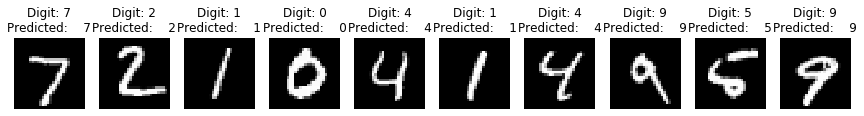

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La rete predice correttamente il $100 \%$ dei dati di test.

### Exercise 12.3

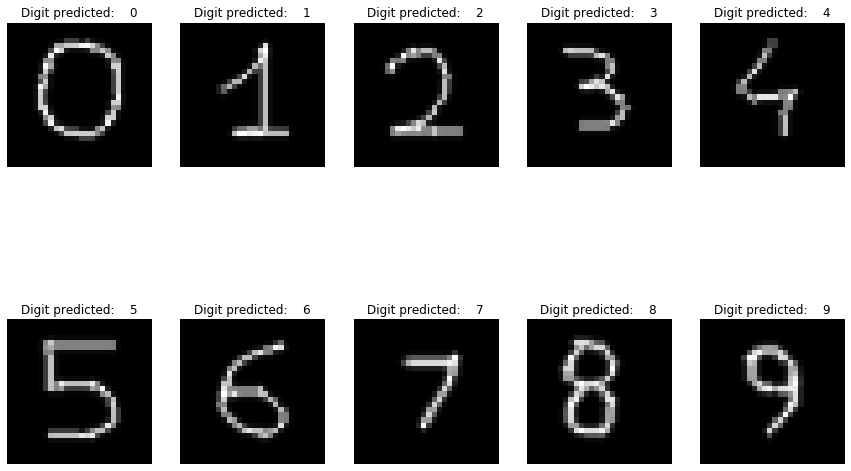

In [14]:
from PIL import Image
import os

digit_filename = ["./Pictures/0b.png", "./Pictures/1b.png", "./Pictures/2b.png", "./Pictures/3b.png", "./Pictures/4b.png", 
                  "./Pictures/5b.png", "./Pictures/6b.png", "./Pictures/7b.png", "./Pictures/8b.png","./Pictures/9b.png"]

plot_data = []
pred_0 = []

for k in range(len(digit_filename)):
    digit_in = Image.open(digit_filename[k]).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix = digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    #plt.figure(figsize=(5,5))
    #plt.imshow(data, cmap='gray')
    #plt.show()

    #print(data[k].shape)

    data = data.reshape(1,xdim*ydim)

    #print(data[k].shape)
    pred_0.append(model_DNN.predict(data))

    plot_data.append(data.reshape(xdim,ydim))
    

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))
ax0 = plt.subplot2grid((2,5), (0,0))
ax1 = plt.subplot2grid((2,5), (0,1))
ax2 = plt.subplot2grid((2,5), (0,2))
ax3 = plt.subplot2grid((2,5), (0,3))
ax4 = plt.subplot2grid((2,5), (0,4))
ax5 = plt.subplot2grid((2,5), (1,0))
ax6 = plt.subplot2grid((2,5), (1,1))
ax7 = plt.subplot2grid((2,5), (1,2))
ax8 = plt.subplot2grid((2,5), (1,3))
ax9 = plt.subplot2grid((2,5), (1,4))


ax0.imshow(plot_data[0], cmap='gray')    
ax0.set_title("Digit predicted:    {}".format(np.argmax(pred_0[0])))
ax0.axis('off') 
ax1.imshow(plot_data[1], cmap='gray')    
ax1.set_title("Digit predicted:    {}".format(np.argmax(pred_0[1])))
ax1.axis('off') 
ax2.imshow(plot_data[2], cmap='gray')    
ax2.set_title("Digit predicted:    {}".format(np.argmax(pred_0[2])))
ax2.axis('off') 
ax3.imshow(plot_data[3], cmap='gray')    
ax3.set_title("Digit predicted:    {}".format(np.argmax(pred_0[3])))
ax3.axis('off') 
ax4.imshow(plot_data[4], cmap='gray')    
ax4.set_title("Digit predicted:    {}".format(np.argmax(pred_0[4])))
ax4.axis('off') 
ax5.imshow(plot_data[5], cmap='gray')    
ax5.set_title("Digit predicted:    {}".format(np.argmax(pred_0[5])))
ax5.axis('off') 
ax6.imshow(plot_data[6], cmap='gray')    
ax6.set_title("Digit predicted:    {}".format(np.argmax(pred_0[6])))
ax6.axis('off') 
ax7.imshow(plot_data[7], cmap='gray')    
ax7.set_title("Digit predicted:    {}".format(np.argmax(pred_0[7])))
ax7.axis('off')
ax8.imshow(plot_data[8], cmap='gray')    
ax8.set_title("Digit predicted:    {}".format(np.argmax(pred_0[8])))
ax8.axis('off') 
ax9.imshow(plot_data[9], cmap='gray')    
ax9.set_title("Digit predicted:    {}".format(np.argmax(pred_0[9])))
ax9.axis('off') 

plt.show()

La rete predice correttamente il $100 \%$ dei caratteri inseriti manualmente.